<a href="https://colab.research.google.com/github/NancyBudgujjar/Liver-Disease-Prediction/blob/main/Final_GEC_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/uciml/indian-liver-patient-records

Prediction of Liver Disease using Random Forest classifierand balancing imbalanced data

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. 
The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). 
This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Based on chemical compounds(bilrubin,albumin,protiens,alkaline phosphatase) present in human body and tests like SGOT , SGPT the outcome mentioned whether 
person is patient ie needs to be diagnosed or not.

Columns:

*   Age of the patient
*   Gender of the patient

*   Total Bilirubin

*   Direct Bilirubin

*   Alkaline Phosphotase

*   Alamine Aminotransferase
*   Aspartate Aminotransferase


*   Total Protiens

*   Albumin


*   Albumin and Globulin Ratio


*   Dataset: field used to split the data into two sets (patient with liver disease, or no disease) 




In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/indian_liver_patient.csv')
df.shape

(583, 11)

In [4]:
df['Dataset'].value_counts()  # 1 = Liver disease and 2 is no disease

1    416
2    167
Name: Dataset, dtype: int64

In [5]:
categories = {1: 1, 2: 0}   #Now we map 1 = 1(Liver disease), 2 = 0(no disease)
df['Dataset'] = df['Dataset'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
#Y = df["Label"].values

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
df.describe().T  #Values need to be normalized before fitting. 

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [8]:
print(df.isnull().sum())
#df = df.dropna()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [9]:
print(df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815197


In [10]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64


In [11]:
df.duplicated().sum()

13

In [12]:
df = df.drop_duplicates()

In [13]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'Dataset':'Label'})
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


<Axes: xlabel='Label', ylabel='count'>

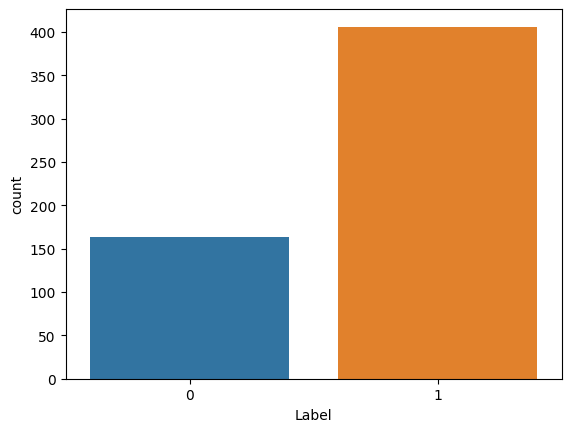

In [14]:
sns.countplot(x="Label", data=df)

<Axes: xlabel='Label', ylabel='count'>

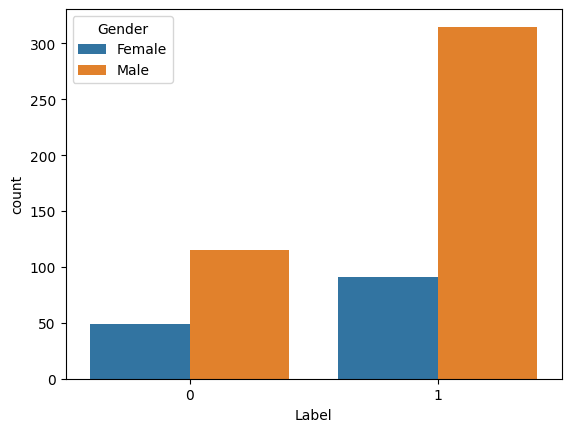

In [15]:
sns.countplot(x="Label", hue="Gender", data=df)

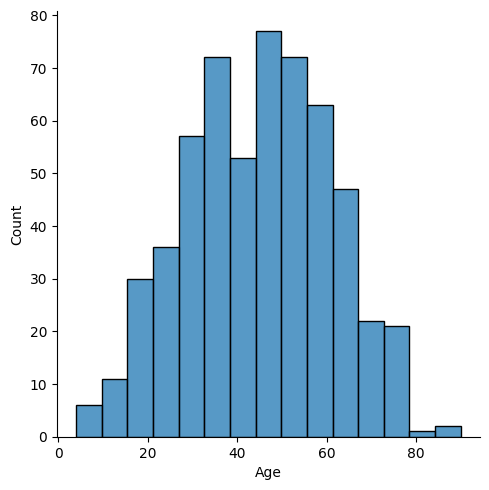

In [16]:
sns.displot(df['Age'], kde=False)

<Axes: xlabel='Age', ylabel='count'>

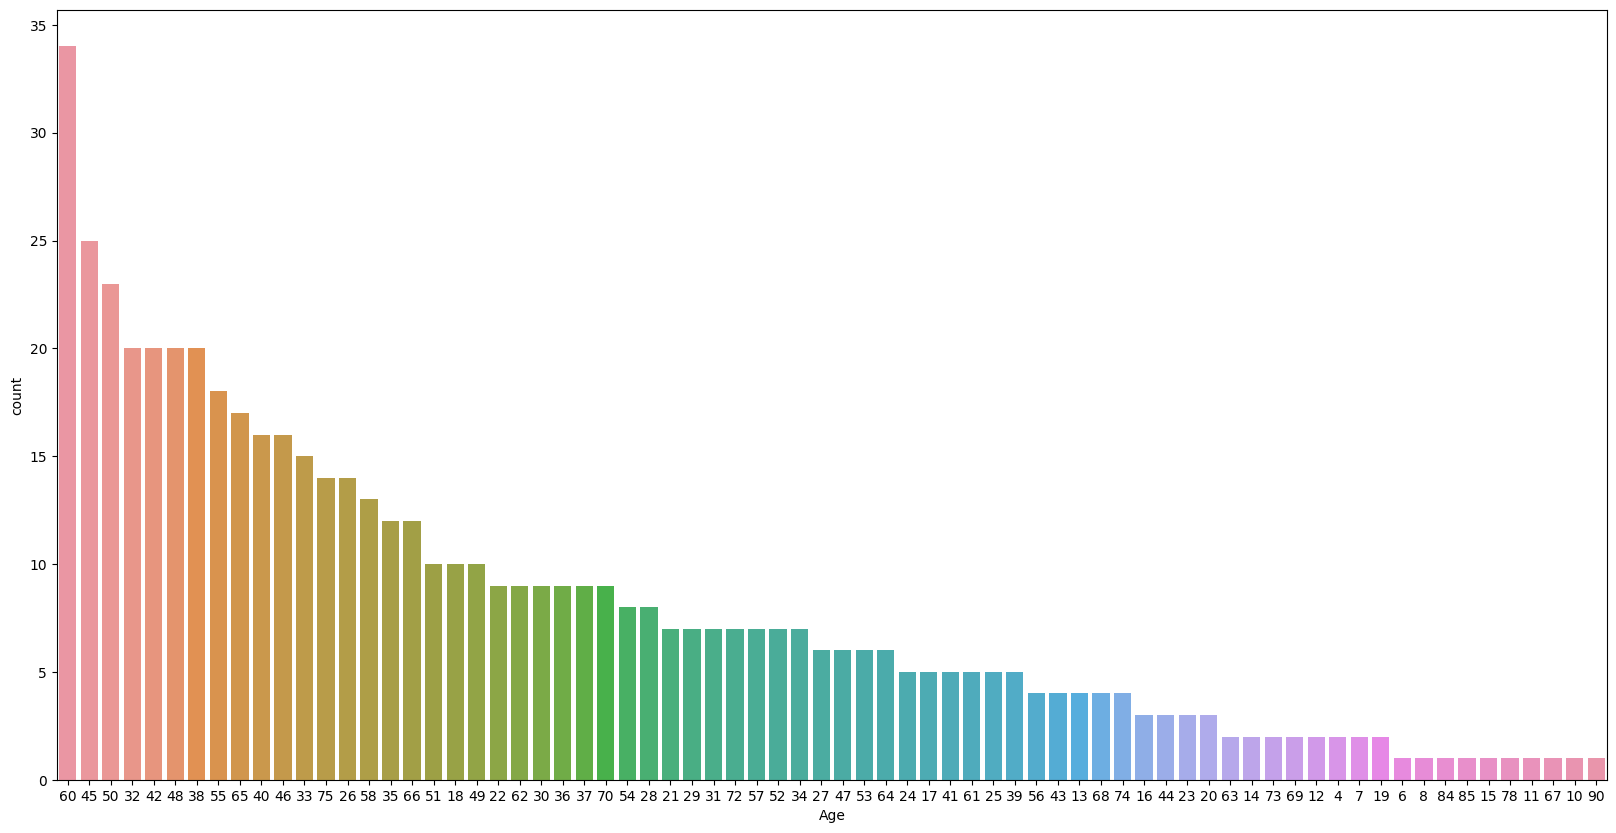

In [17]:
plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

<Axes: xlabel='Label', ylabel='Albumin'>

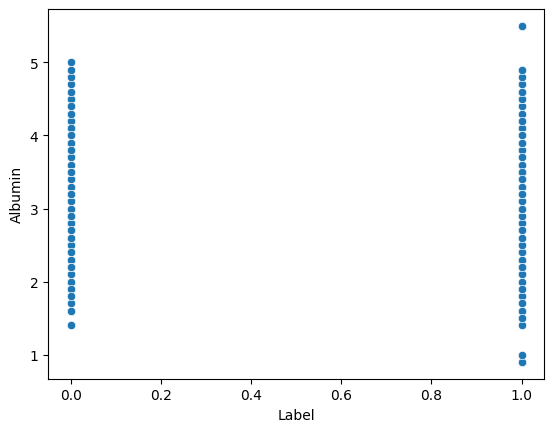

In [18]:
sns.scatterplot(x="Label", y="Albumin", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Label', ylabel='Albumin_and_Globulin_Ratio'>

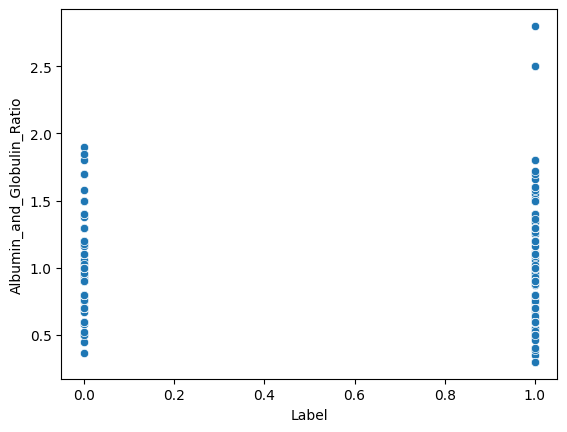

In [19]:
sns.scatterplot(x="Label", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

<Axes: xlabel='Albumin', ylabel='Albumin_and_Globulin_Ratio'>

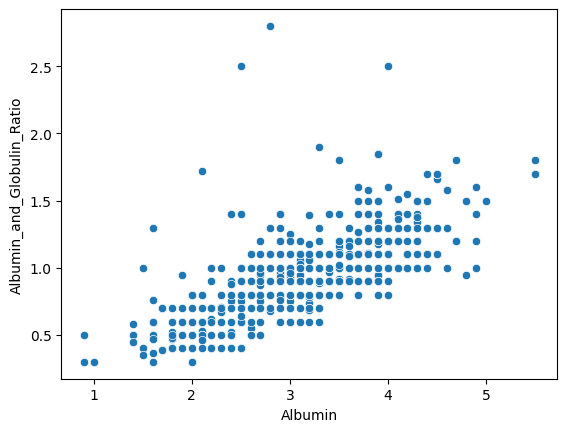

In [20]:
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio", data=df)  #Seems no trend between labels 1 and 2

In [21]:
#sns.pairplot(df, hue='Gender')

<ipython-input-22-5d808ea4b7c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

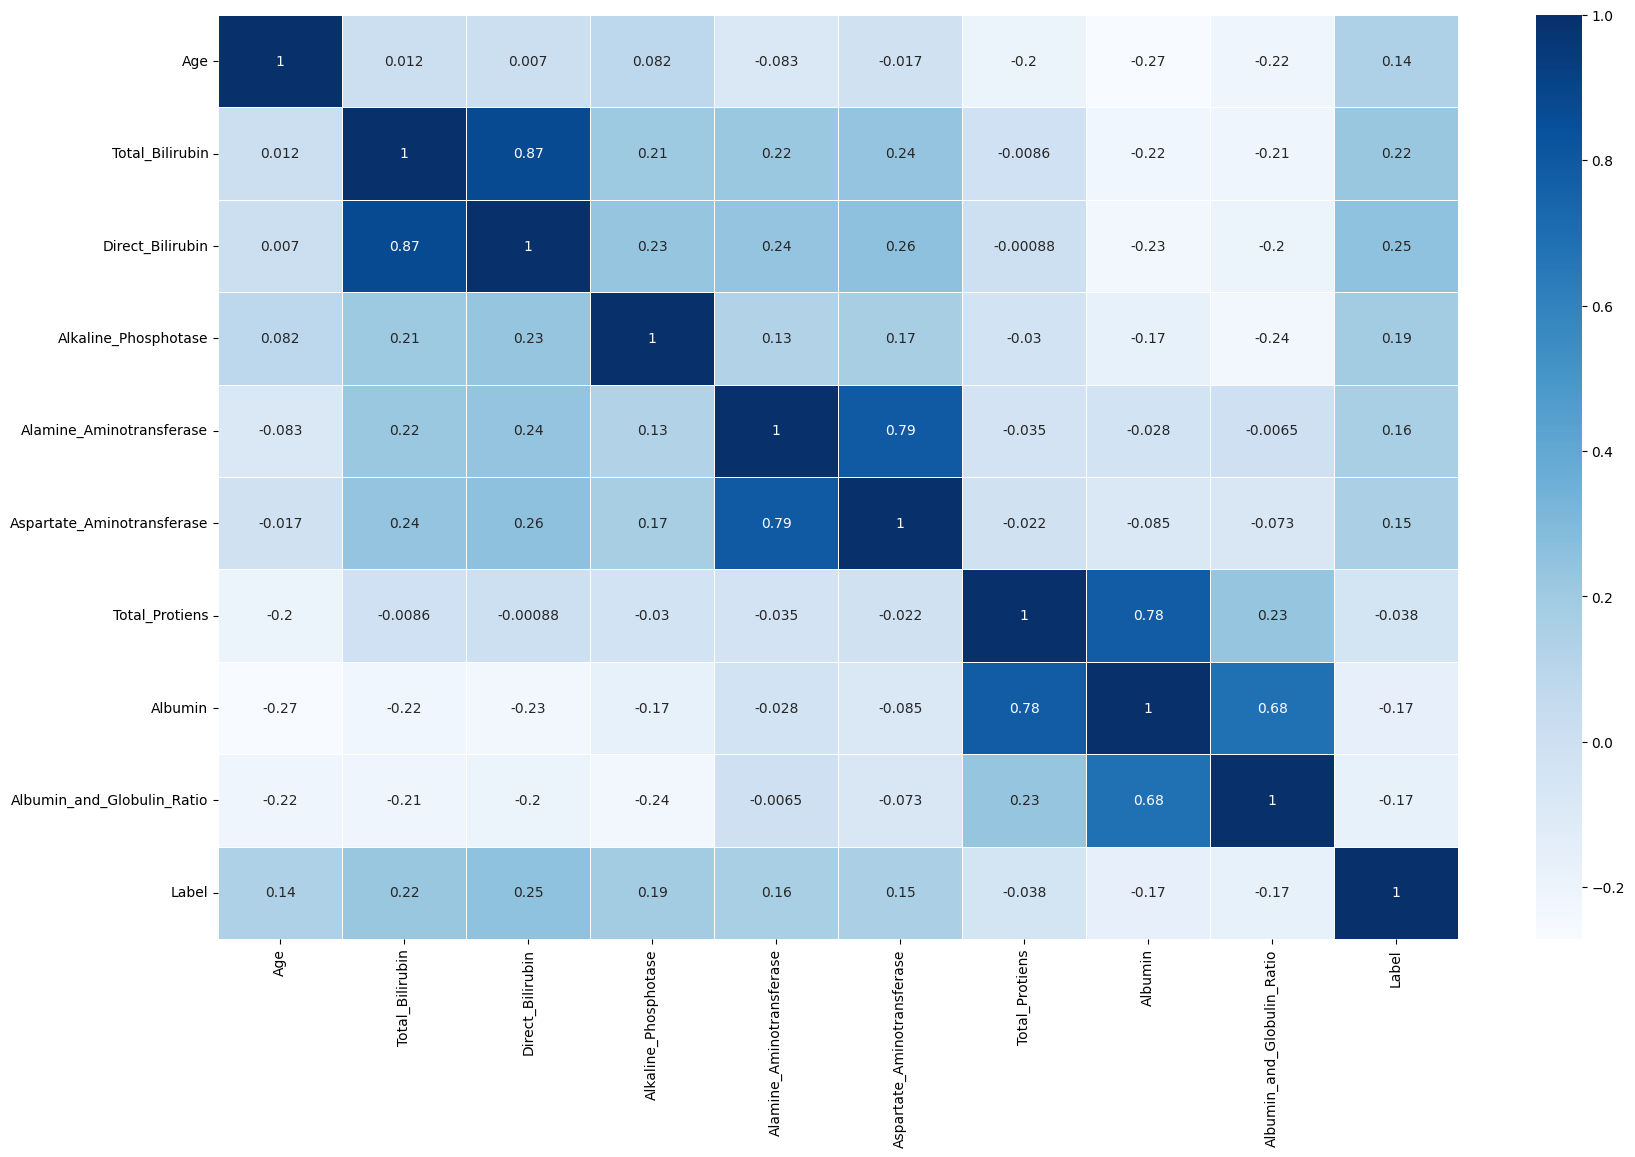

In [22]:
corr=df.corr()
plt.figure(figsize=(20,12)) 
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)
#May be Gender and total protien not big factors influencing the label

In [23]:
df['Gender'].value_counts()  

Male      430
Female    140
Name: Gender, dtype: int64

In [24]:
categories = {"Male":1, "Female":0} #Replace categorical values with numbers
df['Gender'] = df['Gender'].replace(categories)

#Define the dependent variable that needs to be predicted (labels)
Y = df["Label"].values

#Define the independent variables. Let's also drop Gender, so we can normalize other data
X = df.drop(labels = ["Label", "Gender"], axis=1) 

In [25]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 80,20 %
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)

(513, 9)
(513,)


In [26]:
from keras.utils import normalize
X = normalize(X, axis=1)

# Technique 1: Appropriate Model Selection
Logistic regression :- Can be very slow. 

SVM :- can also be extremely slow. 

Random Forest :- ideal for imbalanced datasets. 

#Logestic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=50)

logreg.fit(X_train, y_train) # fit the model on the training data

y_pred = logreg.predict(X_test) # make predictions on the testing data

accuracy = metrics.accuracy_score(y_test, y_pred) # calculate accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7192982456140351


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Support Vector Machine (SVM)

In [28]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7368421052631579


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

models= [('Logistic Regression', LogisticRegression()),
         ('Decision Tree', DecisionTreeClassifier()),
         ('RandomForestClassifier',RandomForestClassifier()),
         ('AdaBoostClassifier',AdaBoostClassifier()),
         ('XGBClassifier',XGBClassifier()),
         ('KNeighborsClassifier',KNeighborsClassifier()),
         ('GaussianNB',GaussianNB ())]

ModelName = []
Train_Acc = []
Test_Acc = []

for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    ModelName.extend([name])
    Train_Acc.extend([train_acc])
    Test_Acc.extend([test_acc])

print(pd.DataFrame({'ModelName': ModelName,
                    'Train_Acc': Train_Acc,
                    'Test_Acc': Test_Acc  }))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                ModelName  Train_Acc  Test_Acc
0     Logistic Regression   0.725146  0.701754
1           Decision Tree   1.000000  0.614035
2  RandomForestClassifier   1.000000  0.719298
3      AdaBoostClassifier   0.803119  0.684211
4           XGBClassifier   1.000000  0.666667
5    KNeighborsClassifier   0.787524  0.631579
6              GaussianNB   0.569201  0.473684


#Random Forest

In [30]:
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train) # Train the model on training data

RandomForestClassifier(n_estimators=25, random_state=42)

In [31]:
#importances = list(model_RF.feature_importances_)
features_list = list(X.columns)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)

Alamine_Aminotransferase      0.145830
Alkaline_Phosphotase          0.129514
Age                           0.124050
Aspartate_Aminotransferase    0.114731
Total_Protiens                0.107097
Total_Bilirubin               0.104507
Direct_Bilirubin              0.103692
Albumin                       0.090413
Albumin_and_Globulin_Ratio    0.080166
dtype: float64


In [32]:
prediction_test_RF = model_RF.predict(X_test) #Test prediction on testing data. 

print("METRICS FOR IMBALANCED DATA: ") #ACCURACY METRICS
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test_RF))

METRICS FOR IMBALANCED DATA: 
Accuracy =  0.6842105263157895


In [33]:
(unique, counts) = np.unique(prediction_test_RF, return_counts=True)
print(unique, counts)

[0 1] [11 46]


In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_test_RF)
print(cm)

[[ 4 11]
 [ 7 35]]


means 10/22 labled are correctly as 0 and 12/22 are mislablled as 1, i.e., 12 are healthy patients but still labelled as 1.

73 our of 92 are correctly labled and 19 are mislablled. 

In [35]:
#Print individual accuracy values for each class, based on the confusion matrix
print("With NO Lung disease = ", cm[0,0] / (cm[0,0]+cm[1,0]))
print("With Lung disease = ",   cm[1,1] / (cm[0,1]+cm[1,1]))

With NO Lung disease =  0.36363636363636365
With Lung disease =  0.7608695652173914


Note the low accuracy for the important class (201 label)

Right metric is ROC AUC

Starting version 0.23.1 you can report this for multilabel problems. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [36]:
from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

print("ROC_AUC score for imbalanced data is:")
print(roc_auc_score(y_test, prediction_test_RF))

ROC_AUC score for imbalanced data is:
0.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


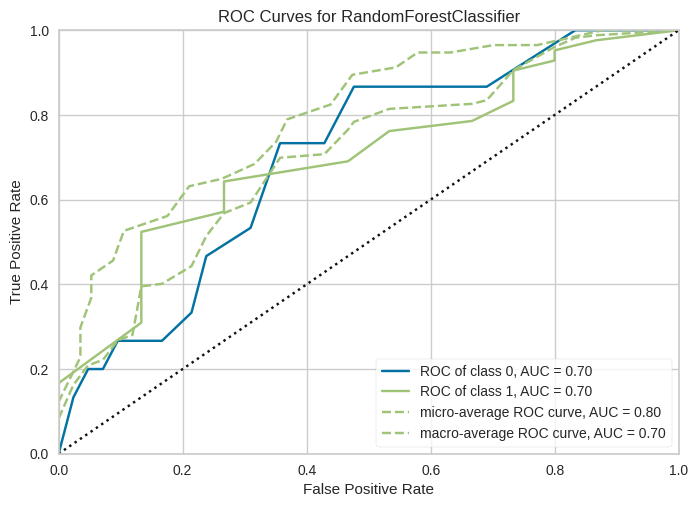

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF)  #Create object
roc_auc.fit(X_train, y_train)
roc_auc.score(X_test, y_test)
roc_auc.show()

# Technique 6: Generate synthetic data (SMOTE and ADASYN)
SMOTE: Synthetic Minority Oversampling Technique

ADASYN: Adaptive Synthetic

https://imbalanced-learn.org/stable/over_sampling.html?highlight=smote

pip install imblearn

SMOTE may not be the best choice all the time. It is one of many things
that you need to explore.

In [38]:
from imblearn.over_sampling import SMOTE, ADASYN

X_smote, Y_smote = SMOTE().fit_resample(X, Y)  #Beware, this takes some time based on the dataset size
X_adasyn, Y_adasyn = ADASYN().fit_resample(X, Y)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

In [39]:
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

Original data:  [0 1] [164 406]


In [40]:
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)
(unique3, counts3) = np.unique(Y_adasyn, return_counts=True)
print("After ADASYN: ", unique3, counts3)

After SMOTE:  [0 1] [406 406]
After ADASYN:  [0 1] [382 406]


In [41]:
model_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_SMOTE.fit(X_train_smote, y_train_smote)
prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))

Accuracy =  0.7668711656441718


In [42]:
print(roc_auc_score(y_test_smote, prediction_test_smote))

0.7578601953601954


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


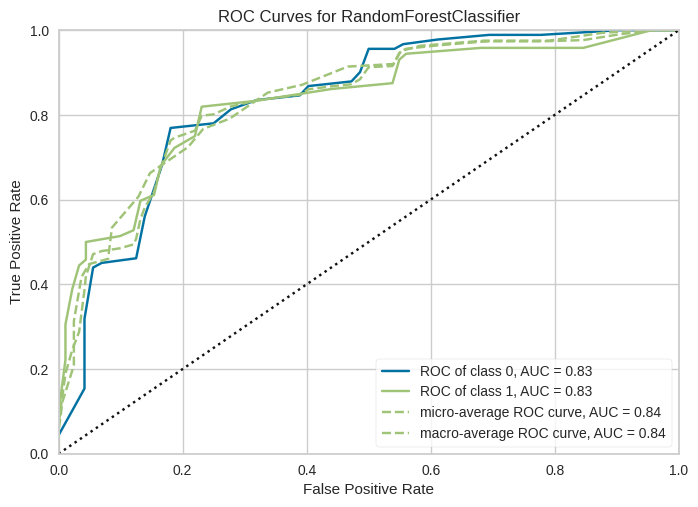

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

# Handling Imbalanced data
 Technique 2 Up-sample minority class

In [44]:
from sklearn.utils import resample
print(df['Label'].value_counts())

1    406
0    164
Name: Label, dtype: int64


In [45]:
#Separate majority and minority classes
df_majority = df[df['Label'] == 1]
df_minority = df[df['Label'] == 0]

In [46]:
# Upsample minority class and other classes separately
# If not, random samples from combined classes will be duplicated and we run into same issue as before, undersampled remians undersampled.
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=416,    # to match average class
                                 random_state=42) # reproducible results

In [47]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Label'].value_counts())

0    416
1    406
Name: Label, dtype: int64


In [48]:
Y_upsampled = df_upsampled["Label"].values

#Define the independent variables
X_upsampled = df_upsampled.drop(labels = ["Label", "Gender"], axis=1) 
X_upsampled = normalize(X_upsampled, axis=1)

In [49]:
#Split data into train and test to verify accuracy after fitting the model. 
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, Y_upsampled, test_size=0.2, random_state=20)

#Train again with new upsamples data

In [50]:
# MODEL 1: Logistic regression

model_logistic = LogisticRegression(max_iter=50).fit(X_upsampled, Y_upsampled)
prediction_test_LR = logreg.predict(X_test_upsampled)

print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_LR))

Accuracy =  0.5272727272727272


In [51]:
# MODEL 2: SVM

model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train_upsampled, y_train_upsampled,)

prediction_test_SVM = model_SVM.predict(X_test_upsampled)
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_SVM))

Accuracy =  0.6242424242424243


In [52]:
# MODEL 3: RANDOM FOREST
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF_upsampled.fit(X_train_upsampled, y_train_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test_upsampled)

print("METRICS FOR BALANCED DATA USING UPSAMPLING : ")
print ("Accuracy = ", metrics.accuracy_score(y_test_upsampled, prediction_test_RF_upsampled))

METRICS FOR BALANCED DATA USING UPSAMPLING : 
Accuracy =  0.896969696969697


In [53]:
(unique, counts) = np.unique(prediction_test_RF_upsampled, return_counts=True)
print(unique, counts)

[0 1] [96 69]


In [54]:
cm_upsampled = confusion_matrix(y_test_upsampled, prediction_test_RF_upsampled)
print(cm_upsampled)

[[83  4]
 [13 65]]


In [55]:
print("With NO Lung disease =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0]))
print("With lung disease = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1]))

With NO Lung disease =  =  0.8645833333333334
With lung disease =  0.9420289855072463


In [56]:
print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, prediction_test_RF_upsampled))

ROC_AUC score for balanced data using upsampling is:
0.8936781609195404


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


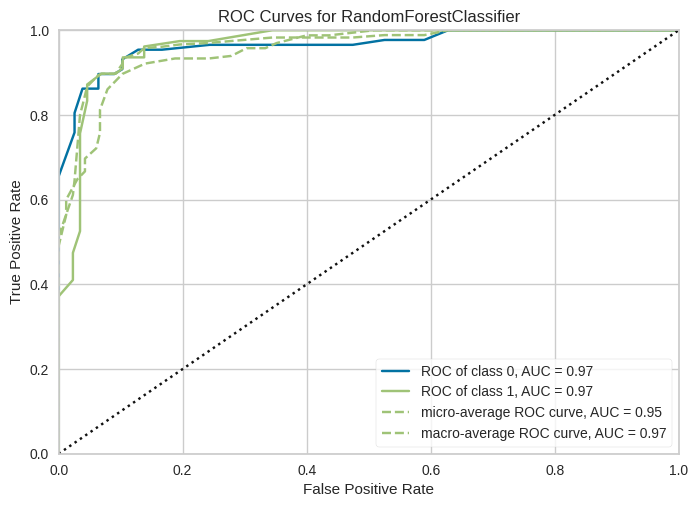

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
from yellowbrick.classifier import ROCAUC

roc_auc=ROCAUC(model_RF_upsampled)
roc_auc.fit(X_train_upsampled, y_train_upsampled)
roc_auc.score(X_test_upsampled, y_test_upsampled)
roc_auc.show()

In [59]:
#SMOTE 
X_smote, Y_smote = SMOTE().fit_resample(X_upsampled, Y_upsampled) 

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=42)

In [60]:
(unique, counts) = np.unique(Y, return_counts=True)
print("Original data: ", unique, counts)

Original data:  [0 1] [164 406]


In [61]:
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

After SMOTE:  [0 1] [416 416]


In [62]:
model_upsampled_SMOTE = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_upsampled_SMOTE.fit(X_train_smote, y_train_smote)
prediction_test_smote = model_SMOTE.predict(X_test_smote)
print ("Accuracy = ", metrics.accuracy_score(y_test_smote, prediction_test_smote))

Accuracy =  0.9640718562874252


In [63]:
print(roc_auc_score(y_test_smote, prediction_test_smote))

0.9626951995373048


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


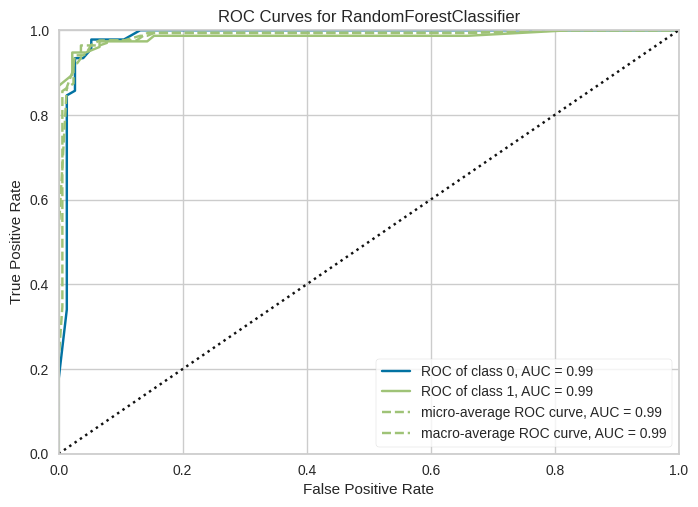

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
from yellowbrick.classifier import ROCAUC
roc_auc=ROCAUC(model_SMOTE)
roc_auc.fit(X_train_smote, y_train_smote)
roc_auc.score(X_test_smote, y_test_smote)
roc_auc.show()

#ENSEMBLE METHODS

In [66]:
# AVERAGING METHOD
from sklearn.metrics import mean_squared_error

pred1 = prediction_test_LR
pred2 = prediction_test_SVM
pred3 = prediction_test_RF_upsampled

pred_final = (pred1+pred2+pred3)/3.0
 
# printing the mean squared error between real value and predicted value
print(mean_squared_error(y_test_upsampled, pred_final))

0.2148148148148148


In [67]:
# MAX VOTING
from sklearn.metrics import log_loss
from sklearn.ensemble import VotingClassifier

model_1 = model_logistic
model_2 = model_SVM
model_3 = model_RF_upsampled

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('logr', model_1), ('svm', model_2), ('rf', model_3)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(X_train_upsampled, y_train_upsampled)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test_upsampled)
 
# printing log loss between actual and predicted value
print(log_loss(y_test_upsampled, pred_final))

11.577658361352784


In [68]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19865 sha256=617938eff575251372daeb8da41947fa8720eb5fcc4358adb2443707665ab4c0
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [69]:
# VOTING ENSEMBLE

from sklearn import model_selection
seed = 42
kfold = model_selection.KFold(n_splits=20)

# create different models
estimators = []

model_1 = LogisticRegression(); estimators.append(('logistic',model_1))
model_2 = SVC(); estimators.append(('svm',model_2))
model_3 = RandomForestClassifier(); estimators.append(('rf',model_3))

# create the ensemble model
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_upsampled, y_train_upsampled, cv=kfold)
print(results.mean())

0.653125


In [70]:
# TUNE ENSEMBLE
from sklearn.model_selection import cross_val_score, GridSearchCV

lr = LogisticRegression(solver='liblinear', random_state=1)
rf = RandomForestClassifier(max_features=9, n_jobs=4, random_state=1)
sv = SVC()

# create an ensemble of 3 classifiers
vc = VotingClassifier([('clf1',lr), ('clf2',rf), ('clf3',sv)])

cross_val_score(vc,X_train_upsampled, y_train_upsampled).mean()

# define VotingClassifier parameters to search
param = {'voting':['hard', 'soft'], 'weights': [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]}

#find the best set of parameters
grid = GridSearchCV(vc, param)
grid.fit(X_train_upsampled, y_train_upsampled)

grid.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 363, in predict
    maj = np.argmax(self.predict_proba(X), axis=1)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py", line 404, in predict_proba
    self._collect_probas(X), axis=0, 

0.6651168170252139

 # k-folds validation

In [82]:
from sklearn.model_selection import cross_val_score
# 20 folds
#In general, the more folds we use in k-fold cross-validation the lower the bias of the test MSE 
#but the higher the variance. Conversely, the fewer folds we use the higher the bias but the lower the variance

scores = cross_val_score(model_RF_upsampled, X_train_upsampled, y_train_upsampled, scoring='r2', cv=20)

print(scores)

[-0.21323529  0.15073529  0.15073529  0.51470588  0.63602941 -0.09191176
  0.51470588  0.02941176  0.39338235  0.51470588  0.39338235  0.63602941
  0.15073529  0.15073529 -0.09191176  0.39338235  0.02941176  0.25
  0.5         0.375     ]


In [83]:
print(np.mean(scores))

0.2693014705882352


In [84]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_RF_upsampled, X_test_upsampled, y_test_upsampled)
print(pred)

[0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1]


In [85]:
scores_test = cross_val_score(model_RF_upsampled, X_test_upsampled, y_test_upsampled, cv=20)
print(scores_test)

[0.77777778 0.66666667 0.66666667 0.88888889 0.77777778 0.5
 0.875      0.875      0.75       1.         0.5        0.75
 0.875      0.625      0.5        0.625      0.75       0.875
 0.75       1.        ]


In [86]:
print(np.mean(scores_test))

0.7513888888888889
